### Chapter 8 - Dimensionality Reduction

#### Building a simple 3D dataset:

In [37]:
import numpy as np

#setting seed
np.random.seed(42)

#initializing variables
m= 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))

X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

X.shape


(60, 3)

#### Principal Components

In [38]:
#finding X relative to center as required by PCA
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

print("VT: ",Vt) # we get 3 pc for the 3 dimesnional feature space

#first two principal components obtained with transpose
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

print("PC1: ", c1)
print("PC2: ", c2)


VT:  [[-0.95250178 -0.24902446 -0.17529172]
 [ 0.29267159 -0.9076305  -0.30091563]
 [ 0.08416476  0.33792558 -0.93740205]]
PC1:  [-0.95250178 -0.24902446 -0.17529172]
PC2:  [ 0.29267159 -0.9076305  -0.30091563]


In [39]:
m, n = X.shape #m has 60 and n has 3

S = np.zeros(X_centered.shape) #A 60 x 3 matrix of zeroes
S[:n, :n] = np.diag(s) #filling diagonal elements with values in s
S

array([[7.05108078, 0.        , 0.        ],
       [0.        , 2.81608982, 0.        ],
       [0.        , 0.        , 0.7518544 ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.

In [40]:
np.allclose(X_centered, U.dot(S).dot(Vt)) #checking if the two matrices are almost similar

True

#### Projecting Down to d Dimensions

In [41]:
W2 = Vt.T[:, :2] #projecting down to 2 dimensions
print(W2)
X2D = X_centered.dot(W2) #obtain lower dimensional feature space using dot product
X2D

[[-0.95250178  0.29267159]
 [-0.24902446 -0.9076305 ]
 [-0.17529172 -0.30091563]]


array([[-0.690074  , -0.36150744],
       [ 1.39636097,  0.34497714],
       [ 1.00728461, -0.35025708],
       [ 0.2736333 , -0.50516373],
       [-0.91324535,  0.26290852],
       [-0.79710027,  0.26718188],
       [-0.55173939,  0.65062721],
       [ 1.41612959,  0.16567641],
       [ 0.40776059, -0.46053322],
       [ 0.85209856, -0.40516935],
       [-0.46269946,  0.61952736],
       [ 1.2826692 ,  0.41018903],
       [ 1.37468032,  0.03618608],
       [-0.96941594,  0.10932241],
       [-0.97219266,  0.14390464],
       [-1.05216924,  0.07740862],
       [-0.92770444, -0.22364286],
       [-0.01473543, -0.4153169 ],
       [-0.47010859, -0.46920058],
       [-0.87761843, -0.08515546],
       [ 0.38973612, -0.45189716],
       [-0.96989867,  0.19819051],
       [-0.93689997, -0.09307933],
       [-0.81304146, -0.26096051],
       [-0.41368569, -0.42009096],
       [ 1.2830484 , -0.02603822],
       [-0.95210787,  0.23163682],
       [-0.2005476 , -0.49130242],
       [ 0.33988682,

X2D_using_svd = X2D

#### Using Scikit Learn

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D_scikit = pca.fit_transform(X)

#printing X after transformation with 2 dimensions
X2D_scikit[:5, :]


array([[-0.690074  , -0.36150744],
       [ 1.39636097,  0.34497714],
       [ 1.00728461, -0.35025708],
       [ 0.2736333 , -0.50516373],
       [-0.91324535,  0.26290852]])

Comparing with principal components computed without scikitlearn

In [43]:
X2D[:5, :]

np.allclose(X2D_scikit, X2D)

True

We can see that they are equivalent

##### Can we recover the 3D points on the plane after transformation? (Scikit Learn)

In [44]:
X3D_inv = pca.inverse_transform(X2D_scikit)

#Comparing with original

np.allclose(X3D_inv, X)

False

We can observe it is isn't all same as some information is lost during the projection step

We can calculate this loss using a metric called reconstruction error

In [45]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1)) 

0.009421417196957216

##### Can we recover the 3D points on the plane after transformation? (SVD Approach)

In [46]:
X3D_inv_using_svd = X2D.dot(Vt[:2, :])

The reconstrcution error calculated by both the methods is same, with svd we need to reverse the mean centering

In [47]:
np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)

True

### Explained Variance Ratio

#### Using Scikit Learn

In [48]:
pca.explained_variance_ratio_

array([0.85406025, 0.13622918])

This shows that the first principal component explains 85.4% of variance and second pc explains 13.6% of variance

In [51]:
1 - pca.explained_variance_ratio_.sum()

0.009710567616013521

This shows we lost 0.97% of variance by project down to 2D from 3D

### Using SVD 

In [52]:
np.square(s) / np.square(s).sum()

array([0.85406025, 0.13622918, 0.00971057])

### Choosing the Right Number of Dimensions

In [55]:
#using MNIST dataset for this example

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False) #as_frame is set to False to avoid getting dataset as a dataframe
mnist.target = mnist.target.astype(np.uint8)



In [56]:
#train test split

from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [59]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 #np.argax return index
d

154

Visualize the variance, and dimensions

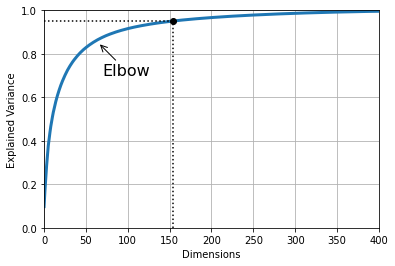

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3) #plotting cumsum which is the sum of pcas till that point
plt.axis([0, 400, 0, 1]) #axis
plt.plot([d, d], [0, 0.95], "k:") #draw the vertical line till where the explained variance is 0.95
plt.plot([0, d], [0.95, 0.95], "k:") #draw the horizontal line intersecting with variance at 0.95
plt.plot(d, 0.95, "ko") #draw the dot at the interesection
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16) #plot the arrow
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.show()

In [65]:
#another way to define is by how much explained variance we should get
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [66]:
pca.n_components_

154

In [67]:
np.sum(pca.explained_variance_ratio_)

0.95045067316349

As we can see the explained variance is 0.95

Randomized PCa, Incremental PCA, Kernale PCA, Hyperparameter Tuning, LLE, Other techniques, Exercises and Visualization (Optional - Remaining